# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('05-x_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('05-x_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('05-y_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('05-y_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **NORMALIZACION DE CARACTERISTICAS**

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [5]:
x_train_std

array([[-0.65379796,  0.10281262, -0.4682503 , ...,  1.06778724,
         0.1084606 ,  1.31225206],
       [-0.97641108, -1.52942526,  1.60008068, ..., -0.15393326,
         0.11696015, -1.72608704],
       [ 0.21171181,  0.60079624, -0.72221572, ...,  1.13488177,
        -0.8253861 ,  1.10824805],
       ...,
       [ 0.95865409,  0.64000465, -0.36105261, ...,  0.35554068,
         0.99731812,  1.08746007],
       [-0.61462443, -0.25676448, -0.18580595, ..., -1.98310881,
        -0.36902821, -0.29852446],
       [-0.5385785 , -0.11600206,  0.64959048, ..., -0.90777035,
         0.29791226,  0.81739015]])

# **MODELO DE MARCHINE LEARNING**

In [8]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               11776     
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [9]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
16/16 [==============================] - 1s 4ms/step - loss: 1.2201 - accuracy: 0.4847
Epoch 2/800
16/16 [==============================] - 0s 4ms/step - loss: 0.9507 - accuracy: 0.6258
Epoch 3/800
16/16 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6524
Epoch 4/800
16/16 [==============================] - 0s 3ms/step - loss: 0.7529 - accuracy: 0.6830
Epoch 5/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.7014
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.7526
Epoch 7/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.7648
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7935
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.8160
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.8139
Epoch 11/

array([3, 0, 1, 0, 2, 3, 0, 3, 3, 1, 3, 3, 0, 3, 1, 1, 3, 0, 0, 0, 2, 0,
       0, 3, 3, 0, 3, 1, 1, 1, 1, 0, 2, 0, 3, 1, 3, 3, 1, 2, 0, 2, 0, 0,
       0, 3, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 3, 1, 0,
       1, 3, 1, 3, 0, 3, 2, 0, 3, 1, 3, 0, 1, 3, 1, 0, 3, 3, 1, 2, 1, 3,
       1, 1, 3, 3, 1, 0, 0, 1, 2, 0, 2, 1, 3, 1, 3, 1, 3, 3, 3, 0, 3, 3,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 3, 3])

# **EVALUACION**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        39
           1       0.56      0.73      0.64        30
           2       0.55      0.55      0.55        11
           3       0.78      0.67      0.72        43

    accuracy                           0.70       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.72      0.70      0.70       123



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        39
           1       0.56      0.73      0.64        30
           2       0.55      0.55      0.55        11
           3       0.78      0.67      0.72        43

    accuracy                           0.70       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.72      0.70      0.70       123

Matriz de confusión, sin normalización
[[29  9  1  0]
 [ 5 22  0  3]
 [ 0  0  6  5]
 [ 2  8  4 29]]


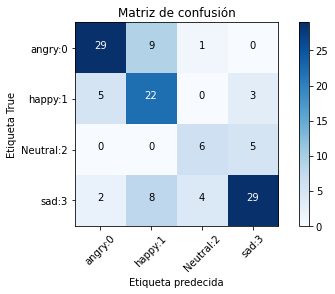

In [16]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')